# Reproducting the Second Figure from My Lunch Talk: Current-Mass distributions of non-compact stars in a cluster (Using Dev branch Version of SPISEA on my Fork)



Here, I try to make current-mass distributions of non compact remnant/non-merger stars in star clusters of 1/10th of solar metallicity.

Firstly, I create isochrones (BPASS and MIST)

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1 = time.time()
bps = evolution.BPASS()
iso1 = synthetic.Isochrone_Binary(9.2, 0.5, 2000,
                                  math.log10(0.1),
                                  mass_sampling=1)
iso2 = synthetic.IsochronePhot(9.2, 0.5, 2000,
                               math.log10(0.1),
                               recomp=True)
# New MIST v.1 isochrone for same metallicity

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=5.00 for T= 20715 logg=7.07
Changing to logg=5.00 for T= 24351 logg=5.62
Changing to logg=5.00 for T= 32004 logg=6.49
Changing to logg=5.00 for T= 39903 logg=7.00
Changing to logg=5.00 for T= 24344 logg=7.21
Changing to logg=5.00 for T= 21592 logg=5.57
Changing to logg=5.00 for T= 23312 logg=7.37
Changing to logg=5.00 for T= 18255 logg=5.15
Changing to logg=5.00 for T= 24030 logg=7.31
Changing to logg=5.00 for T= 31527 logg=6.41
Changing to logg=5.00 for T= 17441 logg=5.06
Changing to T= 50000 for T= 67073 logg=5.76
Changing to logg=5.00 for T= 67073 logg=5.76
Changing to logg=5.00 for T= 33534 logg=6.57
Changing to logg=5.00 for T= 39646 logg=6.99
Changing to logg=5.00 for T= 45852 logg=7.73
Changing to logg=5.00 for T= 23534 logg=7.23
Changing to logg=5.00 for T= 30895 logg=6.47
Changing to logg=5.00 for T= 29347 logg=7.82
Changing to logg=5.00 for T= 24339 logg=5.63
Changing to logg=5.00 for T= 22601 logg=7.33
Changing to logg=5.00 for T= 22989 logg=5.52
Changing to

One thing to note is that in the original figure I mislabeled the  Kennicutt 1983 as a Salpeter 1955 cluster. **Nonetheless**, using my fall 2020 versions of SPISEA, I can still reproduce a similar high-mass tail.

A note on some naming convention: cm suffix stands for current mass.

In the next two cells of code, I will be examining two 200,000 $M_{\odot}$, Salpeter-IMF clusters made using the isochrones I created in the previous code cell. Specifically, I look at the distribution of the current mass of non -compact remnant stars in the clusters.

In [2]:
from spisea import imf, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
clus_1 = synthetic.Cluster_w_Binaries(iso1,
                                      imf.IMFSalpeter1955(multiplicity=
                                                          multiplicity.
                                                          MultiplicityResolvedDK()),
                                      200000, ifmr=ifmr.IFMR_Spera15())
clus_2 = synthetic.ResolvedCluster(iso2,
                                   imf.IMFSalpeter1955(multiplicity=
                                                       multiplicity.
                                                       MultiplicityResolvedDK()),
                                   200000, ifmr=ifmr.IFMR_Spera15())

# extract the BPASS isochrone's Primary stars' and companion stars' current mass
star_systems = clus_1.star_systems
companions = clus_1.companions
prims_cm1 = (star_systems['mass_current']
             [np.where(star_systems['phase'] == 5)[0]])
companions_cm1 = (companions['mass_current']
                  [np.where(companions['phase'] == 5)[0]])
# Note that prims and companions are lists (not Arrays yet)

0 star systems had to be deleted
0 companions had to be deleted
Found 6177 companions out of stellar mass range


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


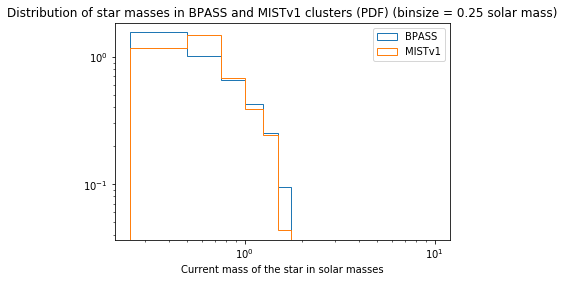

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.hstack((prims_cm1, companions_cm1)), 40, (0, 10),
         density=True, histtype='step', label="BPASS")
star_systems2 = clus_2.star_systems
companions2 = clus_2.companions
prims_cm2 = star_systems2['mass_current'][np.where(star_systems2['phase'] <
                                                   101)[0]]
companions_cm2 = companions2['mass_current'][np.where(companions2['phase'] <
                                                      101)[0]]
plt.hist(np.hstack((prims_cm2 , companions_cm2)), 40, (0, 10),
         density=True, histtype='step', label="MISTv1")
plt.xlabel("Current mass of the star in solar masses")
plt.title("Distribution of star masses in BPASS and" +
          " MISTv1 clusters (PDF) (binsize = 0.25 solar mass)")
plt.xscale('log')
plt.yscale('log')
plt.legend()

In the next two cells I will be examining two 200,000 $M_{\odot}$, Kenicutt-IMF clusters made using the isochrones I created in the previous code cell. Specifically, I look at the distribution of the current mass of non -compact remnant stars in the clusters.

In [4]:
clus_1 = synthetic.Cluster_w_Binaries(iso1,
                                      imf.Kennicutt_1983(multiplicity=
                                                         multiplicity.
                                                         MultiplicityResolvedDK()),
                                      200000, ifmr=ifmr.IFMR_Spera15())
clus_2 = synthetic.ResolvedCluster(iso2,
                                   imf.Kennicutt_1983(multiplicity=
                                                      multiplicity.
                                                      MultiplicityResolvedDK()),
                                   200000, ifmr=ifmr.IFMR_Spera15())

# extract the BPASS isochrone's Primary stars'
# and companion stars' current mass
star_systems = clus_1.star_systems
companions = clus_1.companions
prims_cm1 = (star_systems['mass_current']
             [np.where(star_systems['phase'] == 5)[0]])
companions_cm1 = (companions['mass_current']
                  [np.where(companions['phase'] == 5)[0]])
# Note that prims and companions are lists (not Arrays yet)


0 star systems had to be deleted
0 companions had to be deleted
Found 5021 stars out of mass range
Found 5795 companions out of stellar mass range


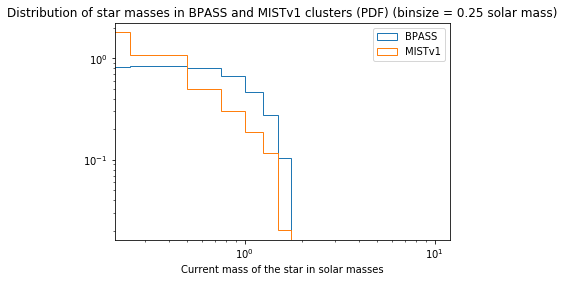

In [5]:
plt.hist(np.hstack((prims_cm1, companions_cm1)), 40, (0, 10),
         density=True, histtype='step', label="BPASS")
star_systems2 = clus_2.star_systems
companions2 = clus_2.companions
prims_cm2 = (star_systems2['mass_current']
             [np.where(star_systems2['phase'] <
                       101)[0]])
companions_cm2 = (companions2['mass_current']
                  [np.where(companions2['phase'] <
                            101)[0]])
plt.hist(np.hstack((prims_cm2, companions_cm2)), 40, (0, 10),
         density=True, histtype='step', label="MISTv1")
plt.xlabel("Current mass of the star in solar masses")
plt.title("Distribution of star masses in BPASS and" +
          " MISTv1 clusters (PDF) (binsize = 0.25 solar mass)")
plt.xscale('log')
plt.yscale('log')
plt.legend()